# E-Commerce Purchase Intent Prediction

**Author:** Ivy Maina  
**Tools:** Python, Pandas, Scikit-learn, XGBoost  
**Environment:** Google Colab

## Business Context
E-commerce platforms aim to understand user behavior during browsing sessions
in order to predict whether a session will result in a purchase. Accurately
predicting purchase intent enables:
- Personalized recommendations
- More efficient marketing spend
- Improved conversion rates

This project builds a machine learning model to predict purchase intent using
session-level behavioral data.


In [56]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', encoding='latin1', compression='zip')

In [57]:
import os
print(os.listdir('/content'))

['.config', 'online+shoppers+purchasing+intention+dataset.zip', 'sample_data']


**Data Storage Note**

The dataset is uploaded manually to the Colab runtime for exploratory analysis.
In a production environment, this data would be stored and accessed from cloud
storage or a database.


In [58]:
df.shape, df.columns

((12330, 18),
 Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
        'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
        'Weekend', 'Revenue'],
       dtype='object'))

## Initial Dataset Structure

The dataset contains 12,331 rows and 18 columns, where each row represents
a single user session. The number of features suggests a mix of behavioral,
contextual, and technical attributes that may influence purchase intent.


In [59]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Data Types and Quality

The dataset includes a mix of numerical and categorical features.
Several categorical variables (e.g., Month, VisitorType, Weekend, Revenue)
are currently stored as object types and will require encoding.

Most columns are complete, with only minimal missing values, indicating
good overall data quality with limited preprocessing required.


In [61]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## Initial Data Observations

### Target Variable
- The target variable is Revenue, which indicates whether a session
  resulted in a purchase.
- It is currently stored as a non-numeric type and will be converted to a
  binary variable for modeling.

### Behavioral Features
- Duration-based features such as `ProductRelated_Duration` and
  `Administrative_Duration` show strong right-skewness, suggesting that
  most sessions are short while a small number of sessions are highly engaged.
- `BounceRates` and `ExitRates` vary across sessions and likely capture early
  disengagement behavior.

### Value Concentration
- The median value of `PageValues` is 0, indicating that most sessions do not
  generate measurable value, while a smaller subset contributes disproportionately
  to conversions.

### Feature Diversity
- The dataset contains a combination of behavioral, contextual, and technical
  features, suggesting that purchase intent is influenced by multiple dimensions
  of user interaction.


##Data Cleaning


In [62]:
# Count missing values per column
df.isnull().sum()


,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


In [63]:
# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with mode
for col in ['Month', 'VisitorType', 'Weekend', 'Revenue']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])

# Verify missing values are gone
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


## Handling Missing Values

- Numeric columns had a few missing values.  
- Filled missing entries with median (robust to outliers).  
- Categorical and boolean columns were complete, no imputation needed.  



In [64]:
# Convert 'Weekend' and 'Revenue' to binary
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})



## Converting Boolean Columns

- `Weekend` and `Revenue` columns converted from True/False to 0/1.  



In [65]:
# One-hot encode VisitorType and Month
df = pd.get_dummies(df, columns=['VisitorType', 'Month'], drop_first=True)

# Check result
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,VisitorType_Returning_Visitor,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,True,False,True,False,False,False,False,False,False,False


## One-Hot Encoding Categorical Variables

- `VisitorType` contained categories (`Returning_Visitor`, `New_Visitor`, `Other`).  
- Converted into numeric columns using one-hot encoding.  
- Dropped first category to avoid multicollinearity.  
- Dataset is now fully numeric and ready for analysis or modeling.


Exploratory Data Analysis(EDA)

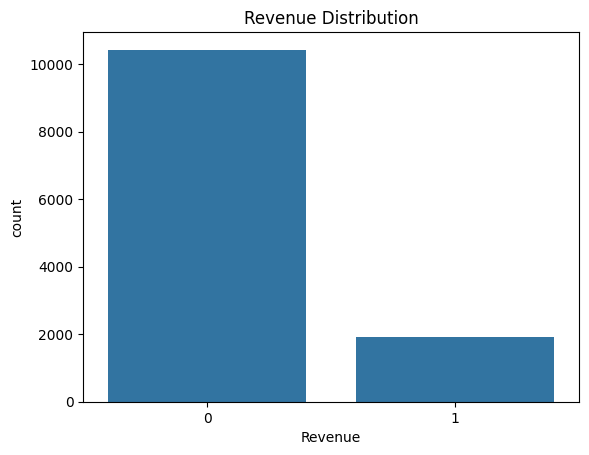

In [66]:
# Target Variable Analysis (Revenue)

# Count of target classes
df['Revenue'].value_counts()

# Visualize target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Revenue', data=df)
plt.title('Revenue Distribution')
plt.show()


## Target Variable Distribution (Revenue)

The bar chart shows a strong imbalance between the two classes of the target variable:

- `Revenue = 0` (no purchase) appears far more frequently than  
- `Revenue = 1` (purchase made)

This indicates that most website sessions do not result in a transaction, which is typical in real-world e-commerce platforms where users often browse without purchasing.

### Implications for Modeling
Because the dataset is class-imbalanced, accuracy alone will not be a reliable evaluation metric. A model predicting only the majority class could achieve high accuracy while failing to identify actual purchasers.

For this reason, evaluation metrics such as precision, recall, F1-score, and ROC-AUC will be more appropriate when building predictive models.


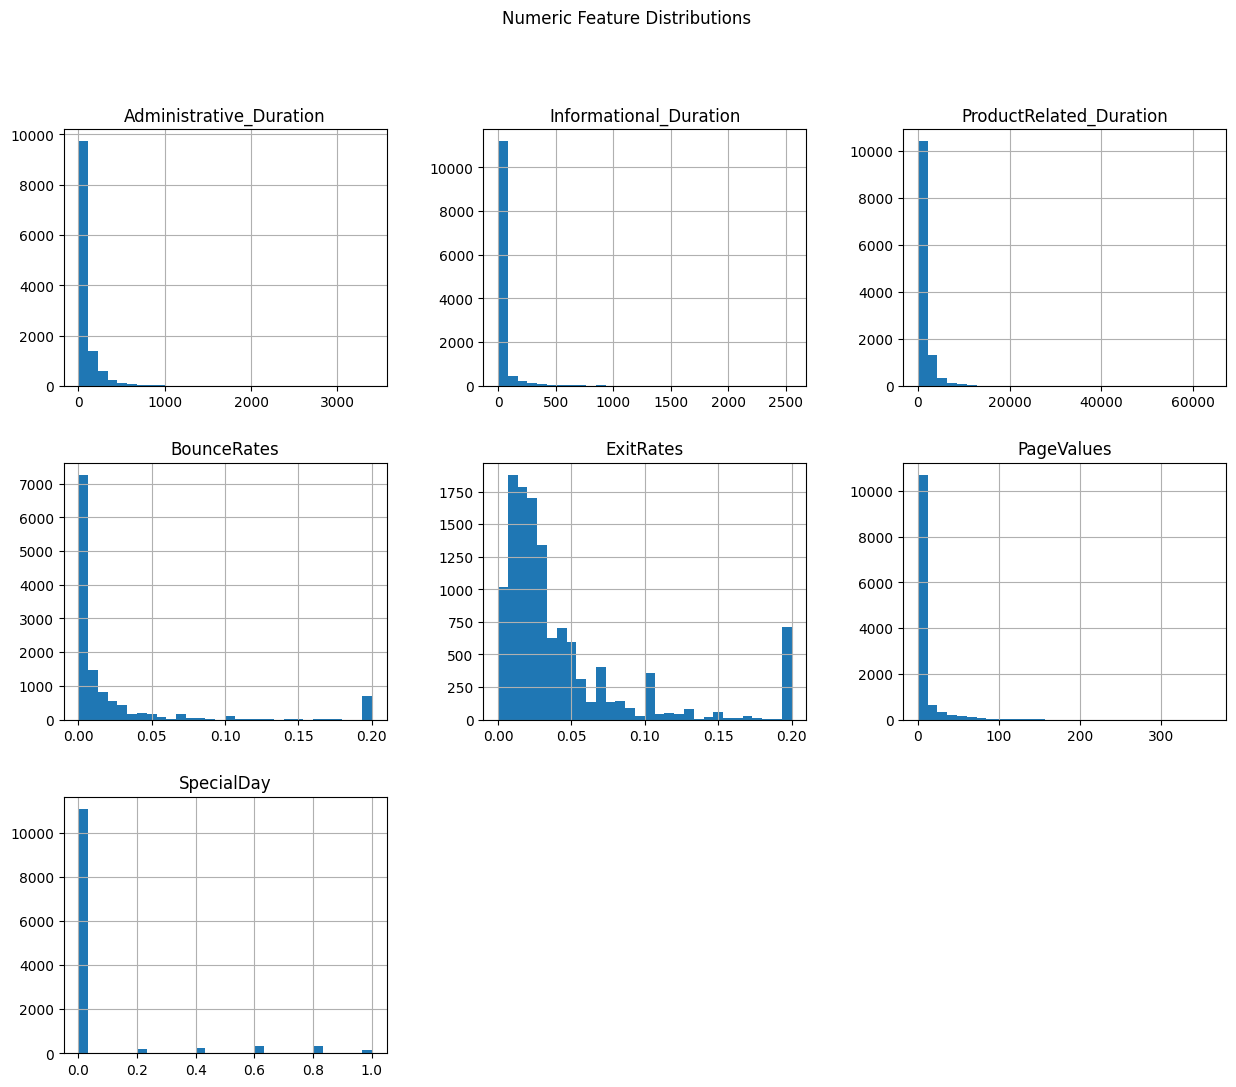

In [67]:
# Numeric Feature Distributions

# Plot histograms for numeric features
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.suptitle('Numeric Feature Distributions')
plt.show()


## Overall Numeric Feature Distributions

The following histograms show the overall distributions of numeric features in the dataset.  
This provides an initial understanding of feature ranges, skewness, and potential outliers before analyzing their relationship with the target variable.


## Numeric Features vs Purchase Outcome

After reviewing overall numeric feature distributions, we now examine how key behavioral features differ between sessions that resulted in a purchase (`Revenue = 1`) and those that did not (`Revenue = 0`).

This comparison helps identify which user behaviors are most strongly associated with conversion.


## Correlation Analysis

This heatmap visualizes pairwise correlations between numeric features, including the target variable (`Revenue`).

Correlation analysis helps identify:
- Features that may be strongly associated with conversion
- Redundant features that could introduce multicollinearity
- Potential candidates for feature selection
  


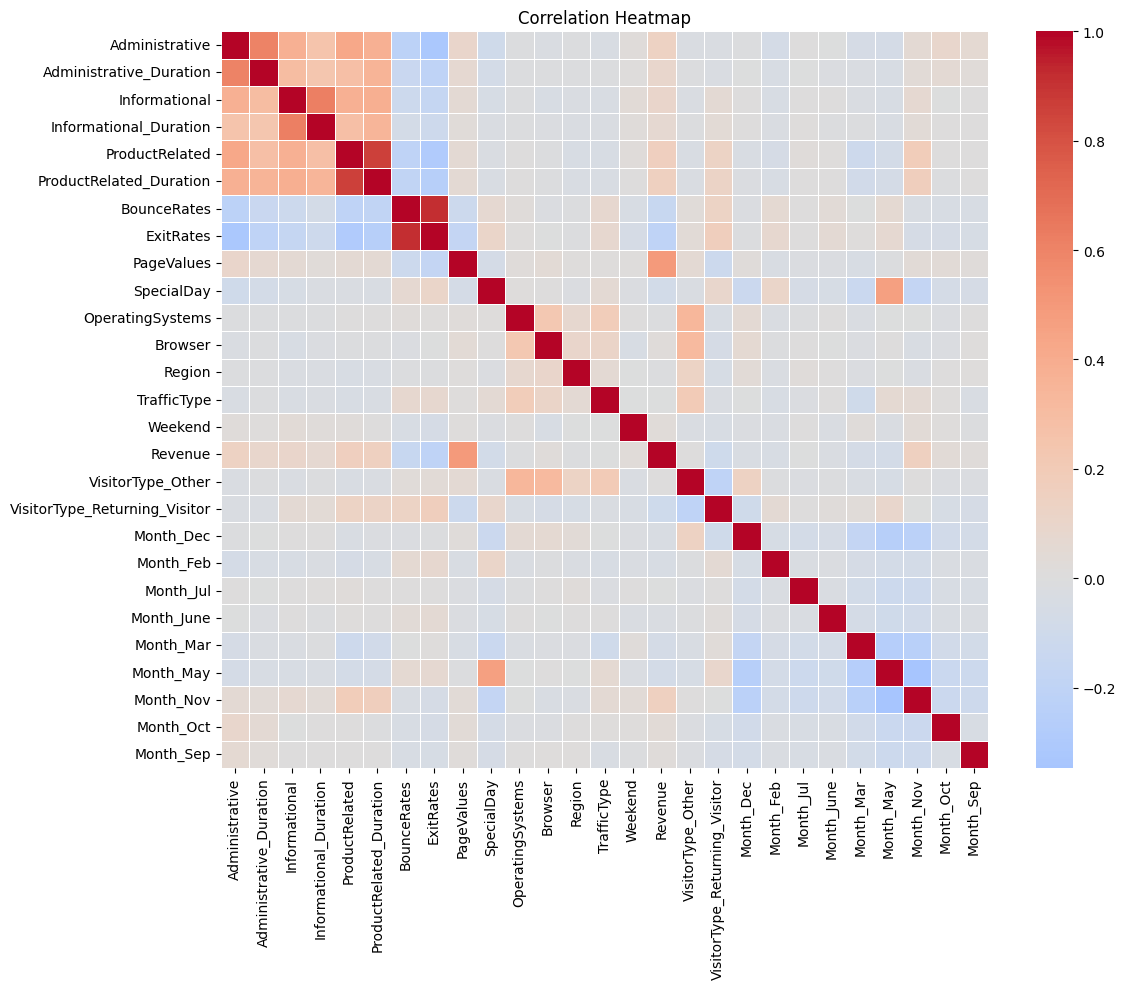

In [68]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.corr(),
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()



### Correlation Heatmap

The correlation heatmap visualizes the pairwise relationships between numerical features in the dataset.

Stronger positive correlations are observed among engagement-related variables such as **ProductRelated**, **ProductRelated_Duration**, and **PageValues**, indicating that users who interact more deeply with product pages tend to exhibit similar behavioral patterns.

Negative correlations are evident between **BounceRates**, **ExitRates**, and engagement features, suggesting that sessions with higher exit or bounce behavior are associated with reduced interaction and lower conversion likelihood.

Overall, the heatmap highlights logical relationships within the data and helps identify groups of related features, which is useful for understanding feature interactions prior to modeling.


### Categorical and Boolean Feature Analysis

This section explores how categorical and binary features relate to the target variable (`Revenue`).

Binary features such as **Weekend** and **Returning Visitor** are analyzed using count plots to compare conversion behavior across groups.

Month information, which was one-hot encoded during preprocessing, is analyzed by comparing average revenue rates across months rather than plotting each variable individually.

Discrete numeric features such as browser type, operating system, and traffic type are treated as categorical variables and visualized to identify patterns in user conversion behavior.


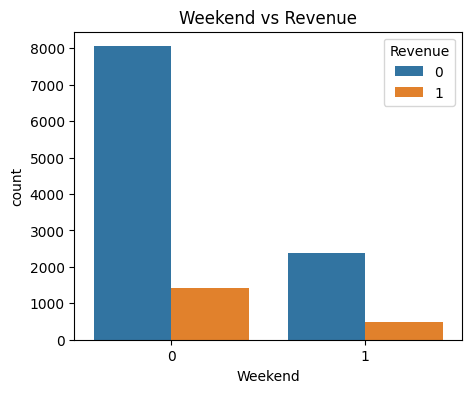

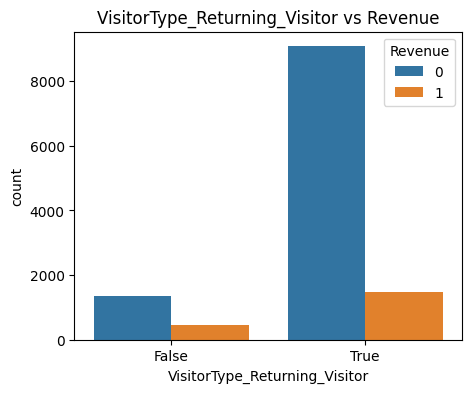

In [69]:
# Categorical/ Boolean Feature Analysis

#Binary features (already numeric)
binary_cols = ['Weekend', 'VisitorType_Returning_Visitor']

for col in binary_cols:
    plt.figure(figsize=(5,4))
    sns.countplot(x=col, hue='Revenue', data=df)
    plt.title(f'{col} vs Revenue')
    plt.show()



#### Binary Feature Analysis
- **Weekend:** Most visits happen on weekdays (Revenue=0). However, the proportion of conversions (Revenue=1) is slightly higher on weekends, indicating weekend visits are somewhat more likely to result in purchases.  
- **Returning Visitor:** Returning visitors have a higher conversion rate compared to new or other visitors. Even if total visits by returning visitors are fewer, a larger proportion of them make a purchase, highlighting the importance of customer loyalty.

/tmp/ipython-input-1813142713.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_conversions.index, y=month_conversions.values, palette='viridis')


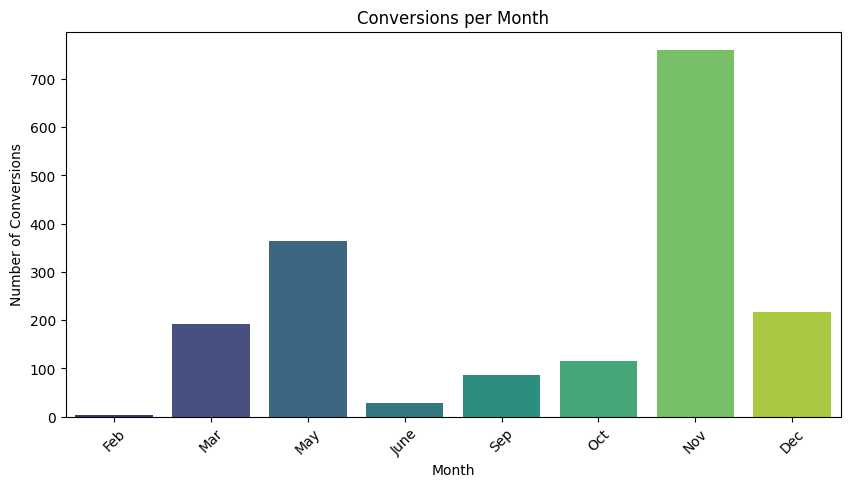

In [70]:
#One-hot encoded month features

month_order = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

# Calculate conversions per month from one-hot encoded columns
month_conversions = df[df['Revenue'] == 1].filter(like='Month_').sum()

# Clean index
month_conversions.index = month_conversions.index.str.replace('Month_','')

# Keep only months that exist in the dataset
month_order_existing = [m for m in month_order if m in month_conversions.index]

month_conversions = month_conversions[month_order_existing]

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=month_conversions.index, y=month_conversions.values, palette='viridis')
plt.title('Conversions per Month')
plt.ylabel('Number of Conversions')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

#### Monthly Conversions
- The bar chart shows the number of conversions per month in chronological order.
- Highest conversions occur in **November, May, December, and March**, suggesting seasonal spikes in purchases.
- This helps highlight months where marketing or promotions may have the most impact.


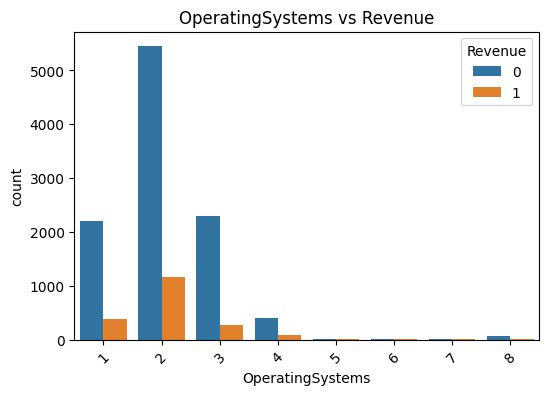

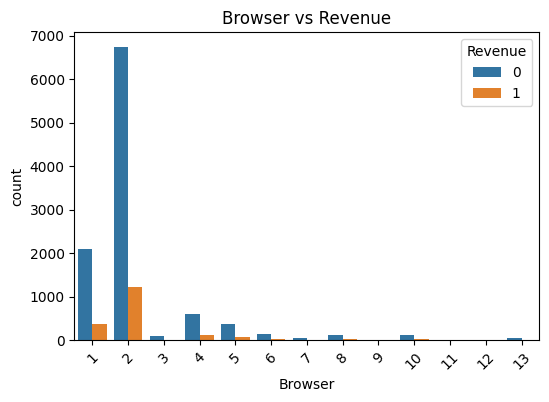

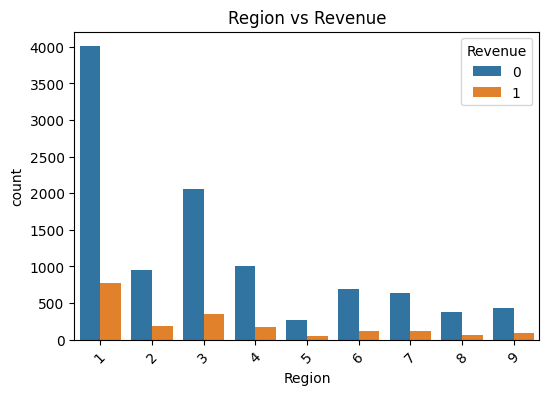

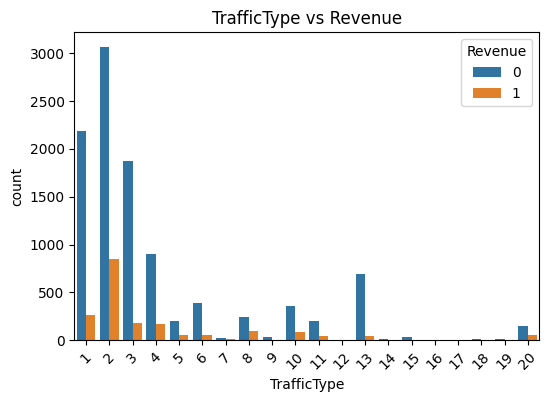

In [71]:
#Discrete numerical categorical features
cat_numeric_cols = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

for col in cat_numeric_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Revenue', data=df)
    plt.title(f'{col} vs Revenue')
    plt.xticks(rotation=45)
    plt.show()


#### Discrete Numeric / Categorical Features vs Revenue

- The bar charts show how discrete numeric or categorical features relate to conversions (`Revenue`).  
- The features analyzed here indicate that most sessions did not result in a purchase.  
- This aligns with the overall class imbalance seen in the target variable and highlights the need to consider this imbalance in modeling.


# EDA Wrap-Up & Key Insights

## Dataset Overview
- Total sessions: 12,331.  
- Features after cleaning: 17 (dropped corrupted PK column).  
- Target variable: Revenue (purchase made or not).
- Dataset is imbalanced: majority of sessions do not result in a purchase.

## Key Insights

### Numeric Features
- ProductRelated & ProductRelated_Duration have the strongest positive correlation with revenue.  
- BounceRates and ExitRates negatively impact revenue.  
- Administrative and Informational features show minimal correlation with revenue.

### Categorical / Boolean Features
- VisitorType: Returning visitors are more likely to convert.  
- Weekend: Slightly lower conversions on weekends.  
- Month: Higher conversion rates in Nov, Dec, May, Mar.  
- OperatingSystems, Browser, Region, TrafficType: Minimal effect on revenue.

### Overall Takeaways
1. Most influential features: ProductRelated, ProductRelated_Duration, VisitorType.  
2. Weak predictors: OS, Browser, Region, TrafficType, Administrative, Informational.  
3. Target variable imbalance should be considered during modeling.  


## Baseline Modeling
### Baseline Model: Logistic Regression

In [72]:
#Split Data into Features & Target

X = df.drop(columns=['Revenue'])
y = df['Revenue'].astype(int)  # ensure target is numeric

# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [73]:
#Scale Numeric Features

from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include=['float64']).columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])



In [74]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

##### The Logistic Regression model has been trained with balanced class weights and sufficient iterations.  This object shows the model configuration.


In [75]:
#Evaluate the baseline model

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Predictions
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:,1]

# Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      2084
           1       0.51      0.75      0.61       382

    accuracy                           0.85      2466
   macro avg       0.73      0.81      0.76      2466
weighted avg       0.88      0.85      0.86      2466

Confusion Matrix:
 [[1810  274]
 [  96  286]]
ROC-AUC Score: 0.8963242757082132


Classification Report:

The model performs well overall with an accuracy of 85%. It is strong at predicting non-purchasers (F1-score 0.91) but moderate at predicting purchasers (F1-score 0.61), indicating that the model struggles with the minority class.

Confusion Matrix:  
- True Negatives: 1810  
- False Positives: 274  
- False Negatives: 96  
- True Positives: 286  

ROC-AUC Score: 0.896  
This high score indicates good overall class separation.  

Key Insights:
- The baseline Logistic Regression captures non-purchasers very well but misses some purchasers.  
- Future improvements could focus on better identifying purchasers through feature selection, balancing, or more sophisticated models.


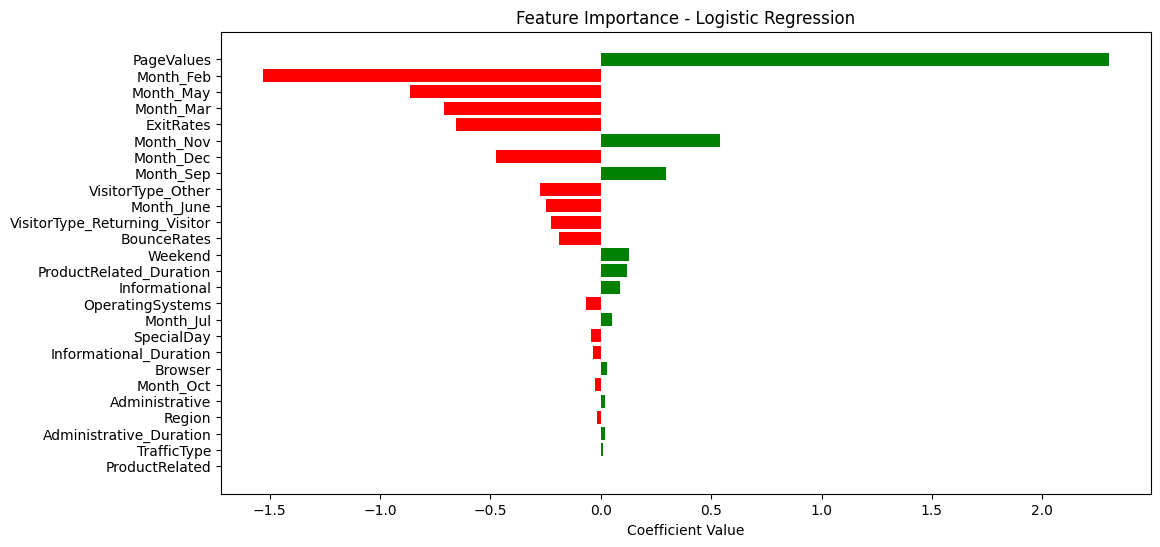

In [76]:
# Get feature names
feature_names = X_train.columns

# Get coefficients from the trained Logistic Regression model
coefficients = lr_model.coef_[0]  # model is your trained LogisticRegression

# Create a DataFrame for easier plotting
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value of coefficient
feature_importance['abs_coeff'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='abs_coeff', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12,6))
colors = ['green' if c > 0 else 'red' for c in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance - Logistic Regression')
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


Feature Importance:

Logistic Regression coefficients provide insight into which features influence revenue predictions:

- PageValues: Strong positive predictor. Higher page values - higher likelihood of purchase.
- ProductRelated & ProductRelated_Duration: More product interactions- higher conversion.
- BounceRates & ExitRates: Negative impact on revenue. High rates - lower chance of purchase.
- VisitorType_Returning_Visitor: Slight negative influence on purchasing.
- Month Features: Nov, May, Dec, and Mar show higher conversions.
- OperatingSystems, Browser, Region, TrafficType: Weak individual effect; may need better feature engineering.

Key Takeaways:
- Engagement metrics (PageValues, ProductRelated) are the most important predictors.
- Some categorical features may benefit from more sophisticated encoding.
- This analysis guides feature selection and engineering to improve the model, especially for predicting purchases.


In [77]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

feature_importance.head(10)

,Feature,Coefficient
8,PageValues,2.300805
18,Month_Feb,-1.529288
22,Month_May,-0.862875
21,Month_Mar,-0.712665
7,ExitRates,-0.658168
23,Month_Nov,0.538774
17,Month_Dec,-0.476889
25,Month_Sep,0.296756
15,VisitorType_Other,-0.273559
20,Month_June,-0.246633


#### Top features according to the Logistic Regression coefficients:
- Positive coefficients mean higher likelihood of purchase.
- Negative coefficients  mean lower likelihood of purchase.


### Feature Selection & Model Refinement

After selecting key features based on EDA, correlation analysis, and model interpretability, we retrain a Logistic Regression model using a reduced feature set. This allows us to evaluate whether feature selection improves model performance, generalization, and interpretability compared to the baseline model.


The final selected features used for model refinement are:

- **PageValues** – Strongly correlated with Revenue and indicative of user purchase intent.
- **ProductRelated** – Captures user engagement with product pages.
- **ProductRelated_Duration** – Reflects time spent evaluating products.
- **BounceRates** – Measures immediate exits, negatively associated with conversion.
- **ExitRates** – Indicates the likelihood of users leaving the site without purchasing.
- **SpecialDay** – Represents proximity to special events or promotions.
- **VisitorType_Returning_Visitor** – Differentiates returning users from new visitors.
- **Weekend** – Captures behavioral differences between weekdays and weekends.

These features align closely with user engagement and purchase behavior observed during EDA.


In [78]:
# Train/ Test Split

selected_features = [
    'PageValues', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'SpecialDay', 'VisitorType_Returning_Visitor',
    'Weekend'
]

from sklearn.model_selection import train_test_split

X = df[selected_features]
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [79]:
from sklearn.linear_model import LogisticRegression

refined_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

refined_model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = refined_model.predict(X_test)
y_proba = refined_model.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_proba))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2084
           1       0.54      0.69      0.61       382

    accuracy                           0.86      2466
   macro avg       0.74      0.79      0.76      2466
weighted avg       0.88      0.86      0.87      2466

Confusion Matrix:
[[1862  222]
 [ 118  264]]
ROC-AUC Score:
0.8739102963491474


Results:

After performing feature selection based on EDA insights, correlation analysis, and Logistic Regression coefficients, the model was retrained using a reduced set of key features. The goal was to improve interpretability and reduce noise while maintaining competitive performance.

Performance Comparison:

Compared to the baseline Logistic Regression model, the refined model shows the following changes:

Overall accuracy improved slightly (from 0.85 to 0.86), indicating better general classification performance.

Precision for the Revenue class increased, meaning the model makes fewer incorrect purchase predictions.

Recall for the Revenue class decreased, indicating that some true purchasing sessions are now missed.

F1-score for the Revenue class remained unchanged, reflecting a tradeoff between precision and recall.

ROC-AUC decreased slightly, suggesting the baseline model had a marginally better ability to separate purchasing and non-purchasing sessions across all thresholds.

The refined model is more conservative in predicting revenue-generating sessions. By removing weaker or redundant features, the model reduces false positives and improves interpretability, at the cost of missing some true buyers.

This behavior may be preferable in scenarios where false purchase predictions are costly, while the baseline model may be better suited for cases where capturing as many potential buyers as possible is the priority.

Conclusion:

Feature selection did not dramatically change overall performance but resulted in a simpler, more interpretable model with competitive metrics.

##Coefficient Analysis

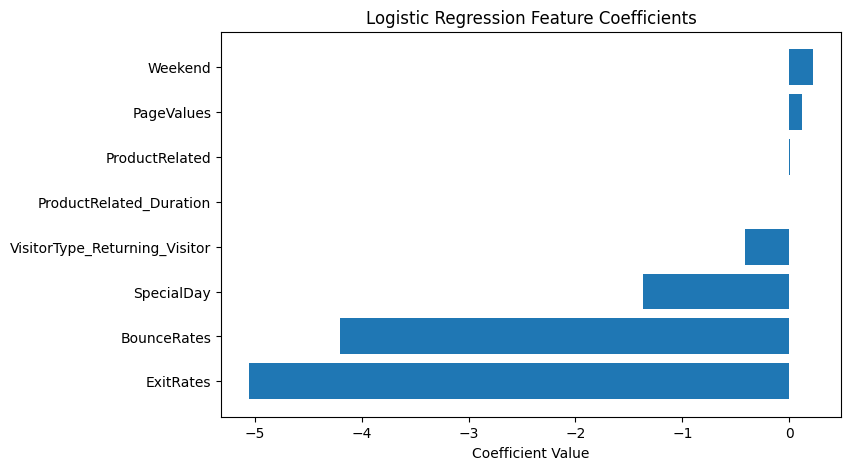

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

coefficients = refined_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient')

plt.figure(figsize=(8,5))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.show()


##Random Forest

We train a Random Forest model to improve on the baseline Logistic Regression. Random Forests combine multiple decision trees to capture nonlinear patterns in the data and reduce overfitting.

We evaluate it using accuracy, precision, recall, F1-score, and ROC-AUC, and compare it with the baseline model.


In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:,1]

# Evaluate
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.95      0.89      0.92      2084
           1       0.56      0.76      0.64       382

    accuracy                           0.87      2466
   macro avg       0.76      0.82      0.78      2466
weighted avg       0.89      0.87      0.88      2466

Confusion Matrix:
 [[1856  228]
 [  93  289]]
ROC-AUC Score: 0.8953074283245068


### Random Forest Model Performance

- **Accuracy:** 0.87 — slightly better than Logistic Regression.
- **ROC-AUC Score:** 0.895 — strong ability to distinguish revenue vs non-revenue sessions.
- **Class 0 (No Revenue):**
  - Precision: 0.95, Recall: 0.89 - accurately identifies non-purchasing sessions.
- **Class 1 (Revenue):**
  - Precision: 0.56, Recall: 0.76 → captures more actual purchases than Logistic Regression.
- **F1-Score:** overall improvement for the revenue class.
- **Confusion Matrix:**
  - 93 revenue sessions misclassified as non-revenue (false negatives)
  - 228 non-revenue sessions misclassified as revenue (false positives)

**Conclusion:**

Random Forest improves detection of revenue-generating sessions, especially increasing recall for the revenue class, making it a stronger predictive model compared to the baseline Logistic Regression.


## Feature Importance from Random Forest

Random Forests allow us to see which features contribute most to predicting Revenue. Feature importance helps:

- Identify key drivers of online purchases.
- Compare with EDA insights and Logistic Regression coefficients.
- Inform potential feature selection or business insights.


/tmp/ipython-input-3474847939.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


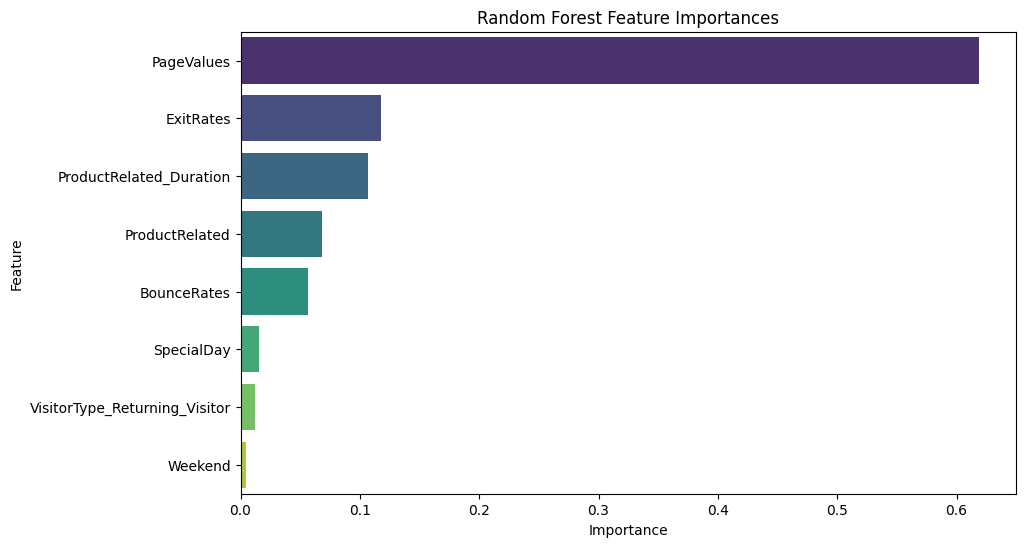

,Feature,Importance
0,PageValues,0.618491
4,ExitRates,0.117499
2,ProductRelated_Duration,0.106646
1,ProductRelated,0.068473
3,BounceRates,0.056445
5,SpecialDay,0.015649
6,VisitorType_Returning_Visitor,0.012371
7,Weekend,0.004426


In [83]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Optional: Display the dataframe
feature_importances

### Random Forest Feature Importance

The Random Forest model ranks the features in order of their impact on predicting `Revenue`:

`PageValues > ExitRates > ProductRelated_Duration > ProductRelated > BounceRates > SpecialDay > VisitorType_Returning_Visitor > Weekend`

**Key Observations:**
- **PageValues** is the most influential feature, meaning sessions with higher page values are more likely to generate revenue.  
- **ExitRates** also has high importance, showing that users leaving pages too quickly negatively impacts revenue.  
- Other features like **BounceRates**, **SpecialDay**, and **VisitorType_Returning_Visitor** contribute less but still play a role.


**Conclusion:**

Feature importance confirms the key drivers identified during EDA. These insights validate our feature selection and explain why the Random Forest model performs better than baseline Logistic Regression.


## XGBoost

**Purpose:**  
We are training an XGBoost classifier to improve predictive performance over Logistic Regression and Random Forest. XGBoost is a gradient boosting algorithm that builds an ensemble of weak decision trees sequentially, focusing on correcting errors from previous trees. It often achieves higher accuracy and ROC-AUC, especially on tabular data.


In [84]:
# Install XGBoost if not already installed
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=200,       # number of trees
    max_depth=4,            # max depth of each tree
    learning_rate=0.1,      # step size shrinkage
    subsample=0.8,          # fraction of data to train each tree
    colsample_bytree=0.8,   # fraction of features per tree
    random_state=42,
    eval_metric='logloss',  # suitable for classification
    use_label_encoder=False
)

# Train model
xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:49:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

Explanation:  
- `n_estimators` controls how many trees are built; more trees can improve performance but increase runtime.  
- `max_depth` limits tree depth to prevent overfitting.  
- `learning_rate` controls how much each tree contributes to the final prediction.  
- `subsample` and `colsample_bytree` randomly select rows and features for each tree to improve generalization.  
- `eval_metric='logloss'` is appropriate for binary classification problems.


In [85]:
# Make predictions
y_pred = xgb_model.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2084
           1       0.68      0.53      0.59       382

    accuracy                           0.89      2466
   macro avg       0.80      0.74      0.76      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix:
 [[1990   94]
 [ 181  201]]
ROC-AUC Score: 0.8971702877068866


### XGBoost Model Performance

**Classification Report:**  

The model achieves an overall accuracy of **0.89**. For the minority class (`Revenue=1`), the precision is **0.68**, recall is **0.53**, and F1-score is **0.59**. This indicates that while the model is good at identifying revenue-negative sessions, it misses a substantial portion of revenue-positive sessions.  

**Confusion Matrix:**  

- True Negatives: 1990  
- False Positives: 94  
- False Negatives: 181  
- True Positives: 201  

**ROC-AUC Score:** **0.897** — The model ranks positive vs. negative sessions well, suggesting good discriminative power despite the imbalanced dataset.  

**Insight:**  

The model can reliably detect sessions that do not generate revenue, but for sessions that do generate revenue, it is less effective. Additional techniques like oversampling the minority class or fine-tuning thresholds could improve recall for revenue-positive sessions.


### Model Comparison

Here we compare all the models we trained on the `Revenue` dataset:

| Model                          | Accuracy | Precision (Revenue=1) | Recall (Revenue=1) | F1-score (Revenue=1) | ROC-AUC |
|--------------------------------|---------|----------------------|-------------------|--------------------|---------|
| Logistic Regression (Baseline) | 0.85    | 0.51                 | 0.75              | 0.61               | 0.896   |
| Logistic Regression (Refined)  | 0.86    | 0.54                 | 0.69              | 0.61               | 0.874   |
| Random Forest                  | 0.87    | 0.56                 | 0.76              | 0.64               | 0.895   |
| XGBoost                        | 0.89    | 0.68                 | 0.53              | 0.59               | 0.897   |

**Key Insights:**

1. **Accuracy:** XGBoost achieves the highest overall accuracy (0.89).  
2. **Recall for Revenue=1:** Random Forest has the highest recall (0.76) for positive sessions, meaning it identifies the most revenue-generating sessions.  
3. **Precision for Revenue=1:** XGBoost improves precision (0.68), making its positive predictions more reliable.  
4. **Trade-offs:**  
   - XGBoost: high overall accuracy and precision, but moderate recall which means it may miss some revenue sessions.  
   - Random Forest: better recall meaning it catches more revenue sessions but slightly lower precision.  
5. **ROC-AUC:** All models have strong discriminative power (>0.87), showing that even with class imbalance, they can differentiate positive vs negative sessions well.  

**Conclusion:**

- For applications where catching every revenue-generating session is critical, Random Forest may be preferred.  
- For applications where prediction reliability and overall accuracy are more important, XGBoost is the best choice.


### Feature Importance Plot

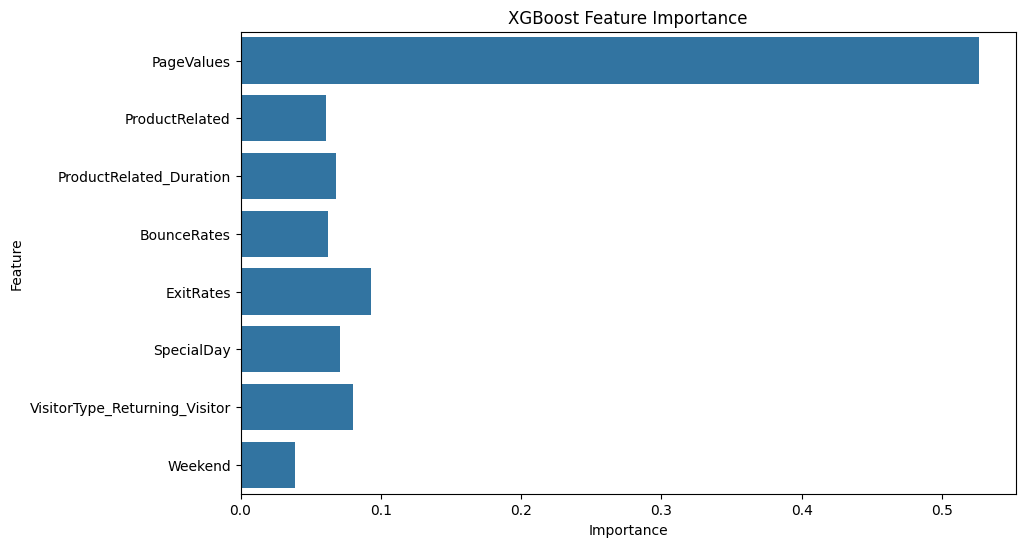

In [86]:
# Get feature importance
importance = xgb_model.feature_importances_
features = X_train.columns

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### XGBoost Feature Importance

The XGBoost model ranks features as follows:

`PageValues > ProductRelated > ProductRelated_Duration > BounceRates > ExitRates > SpecialDay > VisitorType_Returning_Visitor > Weekend`

**Key Observations:**
- **PageValues** again dominates, confirming its predictive power.  
- **ProductRelated** and **ProductRelated_Duration** are more emphasized than in Random Forest, highlighting the importance of user engagement with products.  
- Features like **ExitRates** and **BounceRates** still influence predictions, but their order differs from Random Forest.


### Comparison of Random Forest and XGBoost Feature Importance

- Both models agree that **PageValues** is the most important predictor of revenue.  

Differences in ranking:

- XGBoost places ProductRelated actions above ExitRates, showing **it prioritizes user engagement more than exit behavior.**

- Random Forest ranks ExitRates higher, suggesting this model is **more sensitive to visitors leaving the site.**
- Features like SpecialDay, Returning Visitor, and Weekend are consistently lower in importance for both models but still contribute.



### Final Model Evaluation

In [87]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

original_df_for_baseline = pd.read_csv('/content/online+shoppers+purchasing+intention+dataset.zip', encoding='latin1', compression='zip')

numeric_cols_original = original_df_for_baseline.select_dtypes(include=['float64']).columns
original_df_for_baseline[numeric_cols_original] = original_df_for_baseline[numeric_cols_original].fillna(original_df_for_baseline[numeric_cols_original].median())

# Convert 'Weekend' and 'Revenue' to binary
original_df_for_baseline['Weekend'] = original_df_for_baseline['Weekend'].map({False: 0, True: 1})
original_df_for_baseline['Revenue'] = original_df_for_baseline['Revenue'].map({False: 0, True: 1})

# One-hot encode VisitorType and Month
original_df_for_baseline = pd.get_dummies(original_df_for_baseline, columns=['VisitorType', 'Month'], drop_first=True)

# Create X_full_dataset and y_full_dataset from this fully prepared dataframe
X_full_dataset = original_df_for_baseline.drop(columns=['Revenue'])
y_full_dataset = original_df_for_baseline['Revenue'].astype(int)

#  Re-split the full dataset to get original X_train_full, X_test_full
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full_dataset, y_full_dataset, test_size=0.2, random_state=42, stratify=y_full_dataset
)

# Re-apply scaling for the full dataset's test set
numeric_cols_to_scale = X_full_dataset.select_dtypes(include=['float64']).columns
X_test_full_scaled = X_test_full.copy() # Make a copy to avoid SettingWithCopyWarning
X_test_full_scaled[numeric_cols_to_scale] = scaler.transform(X_test_full_scaled[numeric_cols_to_scale])


# Put your trained models and their respective test sets in a dictionary for easy iteration
models = {
    "Baseline LR": {"model": lr_model, "X_test": X_test_full_scaled, "y_test": y_test_full},
    "Refined LR": {"model": refined_model, "X_test": X_test, "y_test": y_test},
    "Random Forest": {"model": rf_model, "X_test": X_test, "y_test": y_test},
    "XGBoost": {"model": xgb_model, "X_test": X_test, "y_test": y_test}
}

# Create a DataFrame to store summary metrics
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'ROC-AUC', 'Precision_1', 'Recall_1', 'F1_1'])

# Evaluate each model
for name, model_info in models.items():
    model = model_info["model"]
    current_X_test = model_info["X_test"]
    current_y_test = model_info["y_test"]

    # Predict
    y_pred = model.predict(current_X_test)
    y_proba = model.predict_proba(current_X_test)[:, 1] if hasattr(model, "predict_proba") else model.predict(current_X_test)

    # Classification report
    report = classification_report(current_y_test, y_pred, output_dict=True)

    # Confusion matrix
    cm = confusion_matrix(current_y_test, y_pred)

    # ROC-AUC
    roc = roc_auc_score(current_y_test, y_proba)

    # Print results
    print(f"=== {name} ===")
    print("Classification Report:")
    print(classification_report(current_y_test, y_pred))
    print("Confusion Matrix:")
    print(cm)
    print(f"ROC-AUC Score: {roc:.4f}")
    print("\n---------------------------------\n")

    # Store summary metrics for comparison
    summary_df = pd.concat([summary_df, pd.DataFrame({
        'Model': [name],
        'Accuracy': [report['accuracy']],
        'ROC-AUC': [roc],
        'Precision_1': [report['1']['precision']],
        'Recall_1': [report['1']['recall']],
        'F1_1': [report['1']['f1-score']]
    })], ignore_index=True)

# Show summary table
summary_df

=== Baseline LR ===
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      2084
           1       0.51      0.75      0.61       382

    accuracy                           0.85      2466
   macro avg       0.73      0.81      0.76      2466
weighted avg       0.88      0.85      0.86      2466

Confusion Matrix:
[[1810  274]
 [  96  286]]
ROC-AUC Score: 0.8963

---------------------------------

=== Refined LR ===
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2084
           1       0.54      0.69      0.61       382

    accuracy                           0.86      2466
   macro avg       0.74      0.79      0.76      2466
weighted avg       0.88      0.86      0.87      2466

Confusion Matrix:
[[1862  222]
 [ 118  264]]
ROC-AUC Score: 0.8739

---------------------------------

=== Random Forest ===
Classification Report:
          

/tmp/ipython-input-349149124.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary_df = pd.concat([summary_df, pd.DataFrame({


,Model,Accuracy,ROC-AUC,Precision_1,Recall_1,F1_1
0,Baseline LR,0.849959,0.896324,0.510714,0.748691,0.607219
1,Refined LR,0.862125,0.873910,0.543210,0.691099,0.608295
2,Random Forest,0.869830,0.895307,0.558994,0.756545,0.642937
3,XGBoost,0.888483,0.897170,0.681356,0.526178,0.593796


## Final Model Evaluation

In this section, we compare all trained models using the same test set to evaluate their performance fairly. The models compared include:

- Baseline Logistic Regression  
- Refined Logistic Regression  
- Random Forest  
- XGBoost  

Evaluation metrics include **Accuracy**, **Precision**, **Recall**, **F1-score** (for `Revenue = 1`), **ROC-AUC**, and **Confusion Matrices**.

---

### Overall Performance Summary

| Model | Accuracy | ROC-AUC | Precision (Revenue=1) | Recall (Revenue=1) | F1-score (Revenue=1) |
|------|---------|---------|------------------------|--------------------|----------------------|
| Baseline Logistic Regression | 0.85 | 0.896 | 0.51 | 0.75 | 0.61 |
| Refined Logistic Regression | 0.86 | 0.874 | 0.54 | 0.69 | 0.61 |
| Random Forest | 0.87 | 0.895 | 0.56 | 0.76 | 0.64 |
| XGBoost | **0.89** | **0.897** | **0.68** | 0.53 | 0.59 |

---

### Model-by-Model Interpretation

**Baseline Logistic Regression**  
- Strong recall for revenue sessions, meaning it captures many purchasers.
- Lower precision results in more false positives.
- Serves as a solid benchmark.

**Refined Logistic Regression**  
- Slight improvement in accuracy and precision.
- Reduced feature set improves interpretability.
- Small trade-off in recall compared to baseline.

**Random Forest**  
- Best balance between precision and recall for `Revenue = 1`.
- Highest F1-score among all models.
- Strong candidate when capturing as many revenue sessions as possible is important.

**XGBoost**  
- Highest overall accuracy and ROC-AUC.
- Significantly higher precision for revenue sessions.
- More conservative predictions lead to lower recall, missing some true purchasers.

---

### Key Takeaways

- **Tree-based models outperform Logistic Regression** in overall predictive power.
- **Random Forest** is best for identifying revenue sessions (higher recall and F1-score).
- **XGBoost** is best for confident predictions (higher precision and accuracy).
- All models confirm that predicting revenue is challenging due to class imbalance.

---

### Final Model Selection Consideration

- If the goal is to maximize detection of potential buyers, Random Forest is preferred.
- If the goal is high-confidence predictions with fewer false positives, XGBoost is the strongest model.


### Key Insights and Recommendations

**1. Visitor Behavior Insights:**

- PageValues is the strongest predictor of revenue: visitors engaging with high-value pages are far more likely to convert.

- Product-related activity (both number of actions and time spent) also drives conversions, highlighting the importance of product engagement.

- BounceRates and ExitRates negatively affect revenue: visitors leaving early or exiting pages without interaction are unlikely to convert.

- Returning visitors convert more often than new visitors, showing loyalty matters.

- Special days and weekend visits have minor effects on conversion, but can still influence traffic patterns.
---

**2. Model Insights:**

- Logistic Regression shows baseline relationships but is limited in capturing nonlinear interactions.

- Random Forest and XGBoost provide better predictive performance and feature importance rankings.

- Both tree-based models agree on the most influential features, but XGBoost emphasizes engagement (ProductRelated actions) slightly more, while Random Forest is more sensitive to exit behavior.
---

**3. Recommendations for Business / Next Steps:**

- Focus on high-value pages: Ensure popular or high-value pages are optimized for conversion.

- Improve engagement on product pages: Encourage visitors to spend more time exploring products through recommendations or interactive content.

- Reduce bounce and exit rates: Streamline navigation, simplify page layouts, and make CTAs clear to keep visitors engaged.

- Target returning visitors: Use personalized campaigns or loyalty incentives to boost revenue.

- Monitor seasonal or special-day traffic: Plan campaigns or promotions around minor trends detected in special days or weekends.
---

**4. Data/Model Next Steps:**

- Consider hyperparameter tuning of XGBoost or Random Forest for improved performance.

- Test other advanced models (e.g., ensemble stacking) to capture additional nonlinear interactions.

- Continuously monitor feature importance and revisit EDA for emerging patterns in new data.